# Построение модели ML методом k-ближайщих соседей с использованием датасета "Ирисы Фишера"

### Содержание
1. [Подключение библиотек и загрузка датасета](#Подключение-библиотек-и-загрузка-датасета)
2. [О датасете "Ирисы Фишера"](#О-датасете-"Ирисы-Фишера")
3. [Разделение датасета на тренировочную и тестовую выборки](#Разделение-датасета-на-тренировочную-и-тестовую-выборки)
4. [Матрица рассеивания](#Матрица-рассеивания)
5. [Построение модели машинного обучения методом k-ближайших соседей](#Построение-модели-машинного-обучения-методом-k-ближайших-соседей)
6. [Прогнозирование с использованием полученной модели](#Прогнозирование-с-использованием-полученной-модели)
7. [Точность полученной модели](#Точность-полученной-модели)

### Подключение библиотек и загрузка датасета

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris_dataset = load_iris()

### О датасете "Ирисы Фишера"

В интернете представлено огромное множество информации о датасете "Ирисы Фишера". Почитать, например, можно [здесь](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0).

In [2]:
print("Поля датасета: {}".format(iris_dataset.keys()))

Поля датасета: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print("Количество элементов в датасете - {}".format(len(iris_dataset['data'])))

Количество элементов в датасете - 150


In [4]:
iris_dataset['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Разделение датасета на тренировочную и тестовую выборки

На тренировочную выборку по умолчанию распределяется в случайном порядке 75% от датасета, а на тестовую 25%

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                                    iris_dataset['target'],random_state=0)

print(
    f"Тренировочная выборка:\
    \nРазмерность матрицы признаков: {X_train.shape}\
    \nРазмерность вектора меток: {y_train.shape}\
    \n\nТестовая выборка:\
    \nРазмерность матрицы признаков:{X_test.shape}\
    \nРазмерность вектора меток: {y_test.shape}"
)

Тренировочная выборка:    
Размерность матрицы признаков: (112, 4)    
Размерность вектора меток: (112,)    

Тестовая выборка:    
Размерность матрицы признаков:(38, 4)    
Размерность вектора меток: (38,)


### Матрица рассеивания

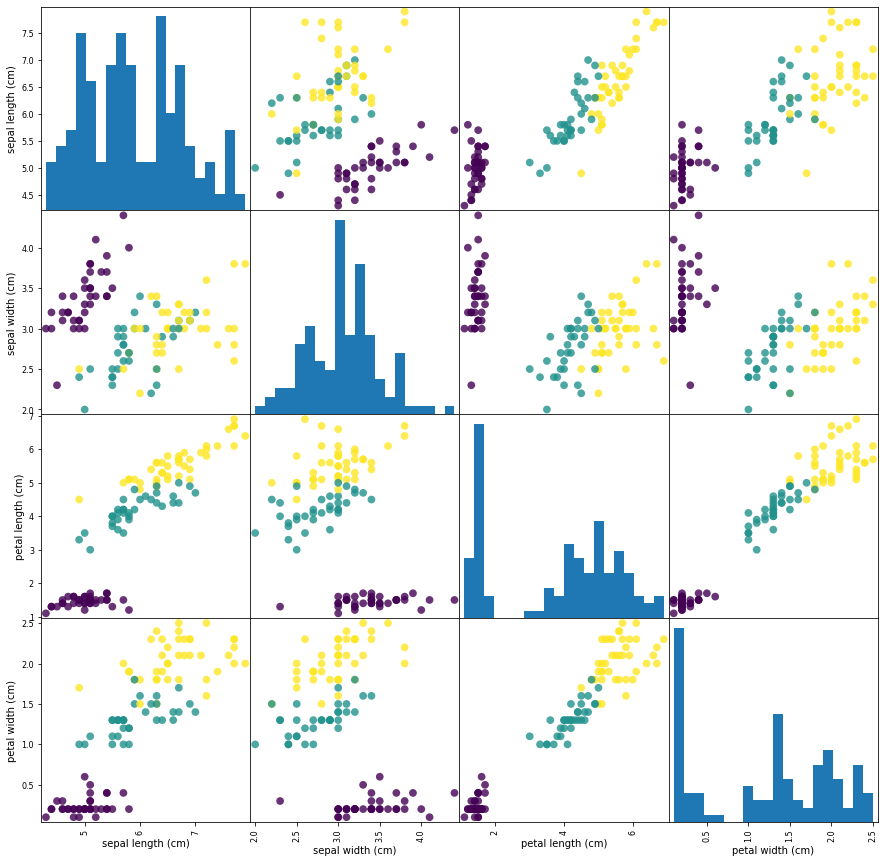

In [10]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

plot = pd.plotting.scatter_matrix(iris_dataframe,
                                  c=y_train, figsize=(15,15), marker='o',
                                  hist_kwds={'bins':20}, s=60, alpha=.8)

### Построение модели машинного обучения методом k-ближайших соседей

Описание метода можно найти в интернете. Например,
[тут](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9), 
[тут](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9),
[тут](https://wiki.loginom.ru/articles/k-nearest-neighbor.html)
и [тут](https://habr.com/ru/post/149693/). \
Гиперпараметр - переменная, влияющая на точность. В этом методе таковым является число соседей.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Прогнозирование с использованием полученной модели

In [12]:
x_new = np.array([[5, 2.9, 1, 0.2]])

prediction = knn.predict(x_new)
print('Прогноз: {}'.format(prediction))
print('Спрогнозированная метка: {}'.format(iris_dataset['target_names'][prediction]))

Прогноз: [0]
Спрогнозированная метка: ['setosa']


In [13]:
y_pred = knn.predict(X_test)
print('Прогнозы для тестового набора: \n {}'.format(y_pred))
print('Метки тестового набора: \n {}'.format(y_test))

Прогнозы для тестового набора: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Метки тестового набора: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


### Точность полученной модели

In [14]:
print('Accurancy: {:.2f}'.format(knn.score(X_test, y_test)))

Accurancy: 0.97


Расчет ошибок с использованием [F-score](https://en.wikipedia.org/wiki/F-score).

In [15]:
from sklearn.metrics import precision_recall_fscore_support

print("Использование других метрик для определения точности модели:")
print(
    "precision = {}\
    \nrecall = {}\
    \nfbeta_score = {}\
    \nsupport = {}".format(*precision_recall_fscore_support(y_test, y_pred, average='macro'))
)

Использование других метрик для определения точности модели:
precision = 0.9666666666666667    
recall = 0.9791666666666666    
fbeta_score = 0.9717034521788342    
support = None
